<a href="https://colab.research.google.com/github/EstherOgutu/Nairobi-Hospital-Hypothyroidism-Analysis/blob/main/Nairobi_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC PASSENGER SURVIVAL ANALYSIS

##1. Defining the Question

###a) Specifying the Data Analytic Question


This is an analysis to predict whether or not a passenger survived in the Titanic.

###b) Defining the Metric of Success


The metric of success for this project is to build a model using KNN technique, which can predic whether or not the passengers who bored the titanic survived or not. The accuracy level of the prediction model should be atleast 80% to be termed as a good model.

###c) Understanding the Context


Titanic, in full Royal Mail Ship (RMS) Titanic, British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 (see Researcher’s Note: Titanic) passengers and ship personnel. One of the most famous tragedies in modern history, it inspired numerous stories, several films, and a musical and has been the subject of much scholarship and scientific speculation.

###d) Recording the Experimental Data


For this project, I will perform the following actions:

1.Reading the data.

2.Checking the data.

3.Tidying the datasets Analysis. For the cleaning part, I will check for outliers, anomalies, missing values,checking for duplicates,dropping unnecessary columns and changing the column names into lowercase for uniformity and stripping off whitespaces and dashes.

4.I will the perform EDA (Univariate and Bivariate).

5 Performing Predictive Anaysis using:

      -K-nearest neighbor (kNN) classifier.
6.I will apply one optimization technique to optimize my model for better performance.

7.Challenge your solution by providing insights on how you can make improvements in model improvement.



###e) Data Relevance

The data has been obtained from Kaggle. The data has attributes that are crucial to predict whether or not a passenger survived in the Titanic incident.This will help to establish the number of survivors and those that perished in the Titanic incident.

##2. Reading Data

In [137]:
# Importing the Libraries that we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,f1_score



In [3]:
# Let's expand the no of visible columns of dataframe
pd.set_option("display.max.columns", None)

In [4]:
# Reading the data from the dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

##3. Checking the data

In [5]:
# Previewing the first five record in the train dataset
# A function to display the first five records of a dataset
def head(df):
  print(tabulate(df.head(), headers='keys', tablefmt='psql'))
head(train)

+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
|----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     | C          |
|  2 |             3 |          1 |        3 | Hei

In [6]:
# Previewing the last five record in the train dataset
# A function to display the last five records of a dataset
def tail(df):
  print(tabulate(df.tail(), headers='keys', tablefmt='psql'))
tail(train)

+-----+---------------+------------+----------+------------------------------------------+--------+-------+---------+---------+------------+--------+---------+------------+
|     |   PassengerId |   Survived |   Pclass | Name                                     | Sex    |   Age |   SibSp |   Parch | Ticket     |   Fare | Cabin   | Embarked   |
|-----+---------------+------------+----------+------------------------------------------+--------+-------+---------+---------+------------+--------+---------+------------|
| 886 |           887 |          0 |        2 | Montvila, Rev. Juozas                    | male   |    27 |       0 |       0 | 211536     |  13    | nan     | S          |
| 887 |           888 |          1 |        1 | Graham, Miss. Margaret Edith             | female |    19 |       0 |       0 | 112053     |  30    | B42     | S          |
| 888 |           889 |          0 |        3 | Johnston, Miss. Catherine Helen "Carrie" | female |   nan |       1 |       2 | W./C. 6

In [7]:
# Previewing the first five record in the test dataset
head(test)

+----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+---------+------------+
|    |   PassengerId |   Pclass | Name                                         | Sex    |   Age |   SibSp |   Parch |   Ticket |    Fare |   Cabin | Embarked   |
|----+---------------+----------+----------------------------------------------+--------+-------+---------+---------+----------+---------+---------+------------|
|  0 |           892 |        3 | Kelly, Mr. James                             | male   |  34.5 |       0 |       0 |   330911 |  7.8292 |     nan | Q          |
|  1 |           893 |        3 | Wilkes, Mrs. James (Ellen Needs)             | female |  47   |       1 |       0 |   363272 |  7      |     nan | S          |
|  2 |           894 |        2 | Myles, Mr. Thomas Francis                    | male   |  62   |       0 |       0 |   240276 |  9.6875 |     nan | Q          |
|  3 |           895 |      

In [8]:
# Previewing the last five record in the test dataset
tail(test)

+-----+---------------+----------+------------------------------+--------+-------+---------+---------+--------------------+----------+---------+------------+
|     |   PassengerId |   Pclass | Name                         | Sex    |   Age |   SibSp |   Parch | Ticket             |     Fare | Cabin   | Embarked   |
|-----+---------------+----------+------------------------------+--------+-------+---------+---------+--------------------+----------+---------+------------|
| 413 |          1305 |        3 | Spector, Mr. Woolf           | male   | nan   |       0 |       0 | A.5. 3236          |   8.05   | nan     | S          |
| 414 |          1306 |        1 | Oliva y Ocana, Dona. Fermina | female |  39   |       0 |       0 | PC 17758           | 108.9    | C105    | C          |
| 415 |          1307 |        3 | Saether, Mr. Simon Sivertsen | male   |  38.5 |       0 |       0 | SOTON/O.Q. 3101262 |   7.25   | nan     | S          |
| 416 |          1308 |        3 | Ware, Mr. Frederi

In [9]:
# Checking the shape of the train and test datasets (rows and columns)
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


Our train dataset has 891 rows and 12 columns, while our test dataset has 418 rows and 11 columns.

In [10]:
# Understanding our datasets dataset 
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [11]:
# Checking all the columns have the appropriate datatype
print(train.dtypes)
print(test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [12]:
# Checking the statistical information of the numerical values in our datasets
print(tabulate(train.describe(), headers='keys', tablefmt='psql'))
print(tabulate(test.describe(), headers='keys', tablefmt='psql'))

+-------+---------------+------------+------------+----------+------------+------------+----------+
|       |   PassengerId |   Survived |     Pclass |      Age |      SibSp |      Parch |     Fare |
|-------+---------------+------------+------------+----------+------------+------------+----------|
| count |       891     | 891        | 891        | 714      | 891        | 891        | 891      |
| mean  |       446     |   0.383838 |   2.30864  |  29.6991 |   0.523008 |   0.381594 |  32.2042 |
| std   |       257.354 |   0.486592 |   0.836071 |  14.5265 |   1.10274  |   0.806057 |  49.6934 |
| min   |         1     |   0        |   1        |   0.42   |   0        |   0        |   0      |
| 25%   |       223.5   |   0        |   2        |  20.125  |   0        |   0        |   7.9104 |
| 50%   |       446     |   0        |   3        |  28      |   0        |   0        |  14.4542 |
| 75%   |       668.5   |   1        |   3        |  38      |   1        |   0        |  31      |


##4. External Data Source Validation

The dataset has been obtained from Kaggle. I have cross-checked it from another [source](https://osf.io/aupb4/), and it is similar. Hence, it seems to be valid and credible. 


##5. Tidying the Datasets

In [13]:
# Checking for Outliers using IQR method
# Defining a function to check for outliers

def outliers(data):
  # Calculating the first quantile
  Q1=data.quantile(0.25) 
  # Calculating the third quantile
  Q3 = data.quantile(0.75)
  # Calculating the Quartile Range
  IQR = Q3 - Q1 
  print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
  print('-------------------------------------------------------------------------------')
  #Displaying the number of outliers in the fields where the exist
  print(IQR)
outliers(train)

       Age  Cabin  Embarked   Fare   Name  Parch  PassengerId  Pclass    Sex  \
0    False  False     False  False  False  False        False   False  False   
1    False  False     False   True  False  False        False   False  False   
2    False  False     False  False  False  False        False   False  False   
3    False  False     False  False  False  False        False   False  False   
4    False  False     False  False  False  False        False   False  False   
..     ...    ...       ...    ...    ...    ...          ...     ...    ...   
886  False  False     False  False  False  False        False   False  False   
887  False  False     False  False  False  False        False   False  False   
888  False  False     False  False  False   True        False   False  False   
889  False  False     False  False  False  False        False   False  False   
890  False  False     False  False  False  False        False   False  False   

     SibSp  Survived  Ticket  
0    Fal

We will not remove the outliers in this dataset becuase they are valid entries with records that will help in building an accurate model. 

####Checking for Anomalies

In [14]:
# Checking for Anomalies

# Defining a function to check for any duplicates in the datasets
def duplicates(data):
  print(data.duplicated().sum())
duplicates(train)
duplicates(test)

0
0


####Checking for Missing Values

In [15]:
# Find the total Missing Data in each column
def missingdata(data):
  print(data.isnull().sum())
missingdata(train)
print('------------------------------------------')
missingdata(test)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In our train dataset, we have 177 missing values in the age column, 687 in the cabin column and 2 in the membarked column.
In our test dataset, we have 86 missing values in the age column, and 327 in the cabin column.

####Dealing with Missing values

######Age

In [16]:
# For the Age column, we will be filling the missing values with the mean of the values in the Age column.
# We will do this for both the train and test set
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())

######Cabin

In [17]:
# We will drop the Cabin column since it has many missing values (more than 50% of the total data).
# It is also not so crucial in our prediction
train=train.drop('Cabin', axis=1)
test=test.drop('Cabin', axis=1)

######Embarked

In [18]:
# Let's compute the total number of each unique value in the Embarked column.
item_counts = train["Embarked"].value_counts()
print(item_counts)
# We will then fill in the 2 missing values in our train test with "S", since it is the one with the highest number
train['Embarked']=train['Embarked'].fillna('S')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [19]:
# Let's cross-check again for missing values in both our datasets after dealing with the missing values
missingdata(train)
missingdata(test)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


For the Ticket column in the test dataset with 1 missing value we will deal with it later.

In [20]:
#To ensure uniformity,we will change the column names to lower case, stripping of the whitespaces,removing periods, 
#this ensures good readerbility plus every possible naming issue is covered.
train.columns = train.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
print(train.info())
print("------------------------------------------------")
test.columns = test.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 

In [21]:
# Exporting our clean train and test datasets
#
train.to_csv("clean_train.csv", index=False)
test.to_csv("clean_test.csv", index=False)

In [22]:
# Lets read our datasets from our CSV files and create dataframes that we will use
#
train_df=pd.read_csv('clean_train.csv')
test_df=pd.read_csv('clean_test.csv')

# Previewing the first five records using our tabulatetable function created earlier
head(train_df)
head(test_df)

+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------+
|    |   passengerid |   survived |   pclass | name                                                | sex    |   age |   sibsp |   parch | ticket           |    fare | embarked   |
|----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+------------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C          |
|  2 |             3 |          1 |        3 | Heikkinen, Miss. Laina                              |

##6. Exploratory Data Analysis for our Train Dataset

###1. Univariate Analysis

In [23]:
# Getting a description of the statistics of numerical values
print(tabulate(train_df.describe(), headers='keys', tablefmt='psql'))

+-------+---------------+------------+------------+----------+------------+------------+----------+
|       |   passengerid |   survived |     pclass |      age |      sibsp |      parch |     fare |
|-------+---------------+------------+------------+----------+------------+------------+----------|
| count |       891     | 891        | 891        | 891      | 891        | 891        | 891      |
| mean  |       446     |   0.383838 |   2.30864  |  29.6991 |   0.523008 |   0.381594 |  32.2042 |
| std   |       257.354 |   0.486592 |   0.836071 |  13.002  |   1.10274  |   0.806057 |  49.6934 |
| min   |         1     |   0        |   1        |   0.42   |   0        |   0        |   0      |
| 25%   |       223.5   |   0        |   2        |  22      |   0        |   0        |   7.9104 |
| 50%   |       446     |   0        |   3        |  29.6991 |   0        |   0        |  14.4542 |
| 75%   |       668.5   |   1        |   3        |  35      |   1        |   0        |  31      |


In [24]:
# Getting a description of the statistics of categorical values
print(tabulate(train_df.describe(include=['O']), headers='keys', tablefmt='psql'))

+--------+-------------------------+-------+----------+------------+
|        | name                    | sex   |   ticket | embarked   |
|--------+-------------------------+-------+----------+------------|
| count  | 891                     | 891   |      891 | 891        |
| unique | 891                     | 2     |      681 | 3          |
| top    | Braund, Mr. Owen Harris | male  |   347082 | S          |
| freq   | 1                       | 577   |        7 | 646        |
+--------+-------------------------+-------+----------+------------+


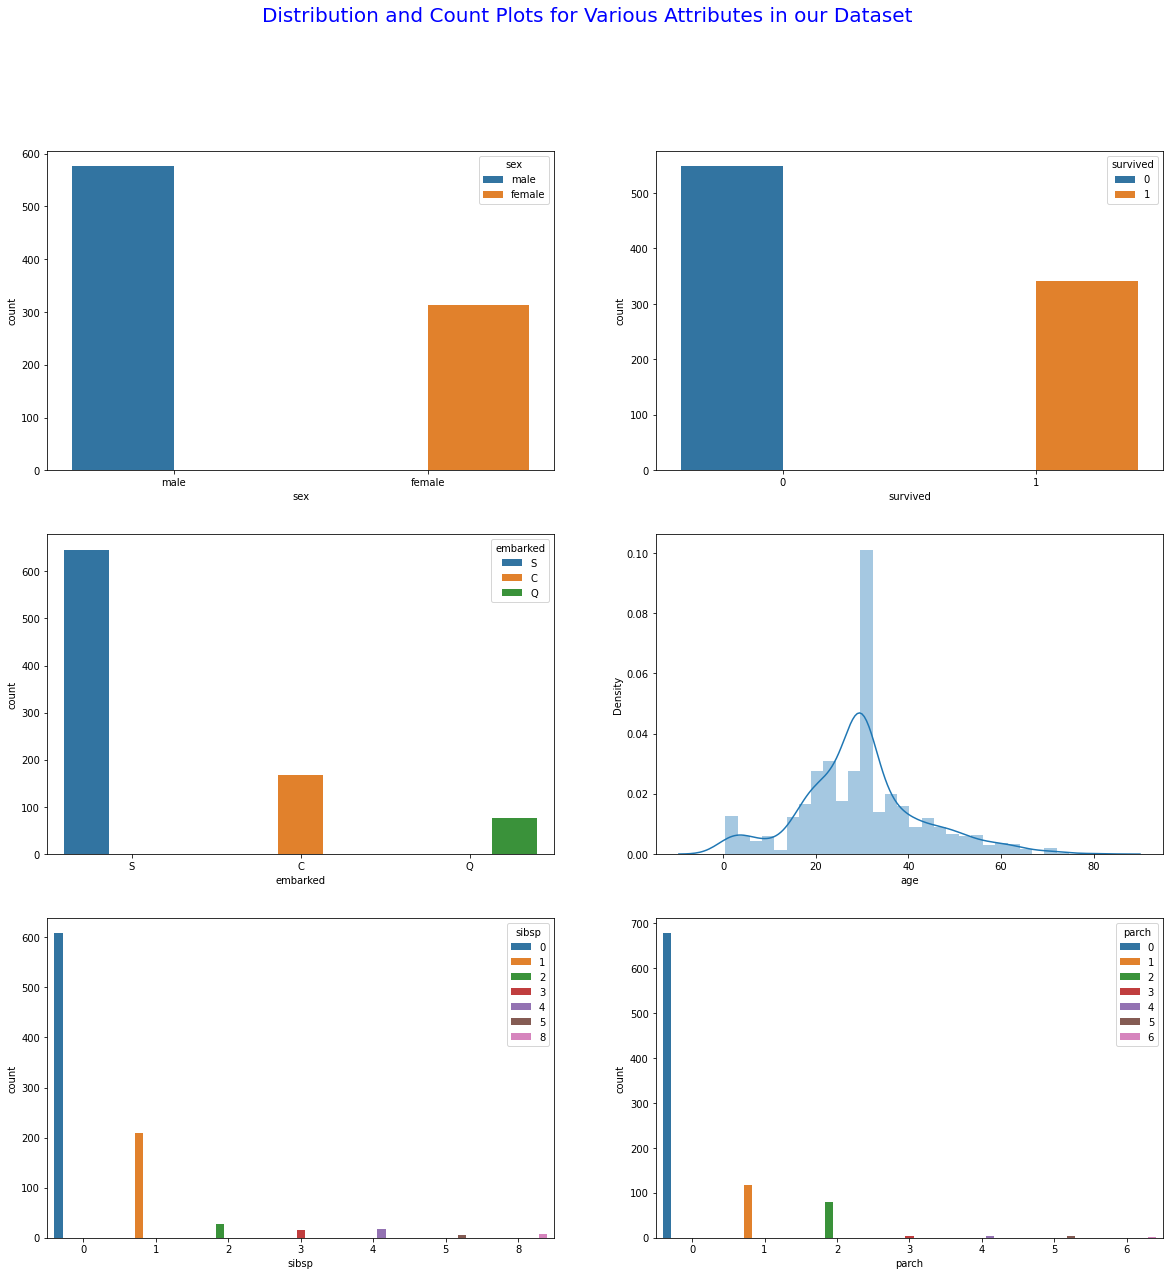

In [25]:
# Plotting Distribution Plots and Count Plots for the various attributes in our train dataset
fig,axes=plt.subplots(3,2, figsize=(20,20))
fig.suptitle('Distribution and Count Plots for Various Attributes in our Dataset', fontsize = 20, color='blue')
sns.countplot('sex', data=train_df, hue='sex', ax=axes[0,0])
sns.countplot('survived', data=train_df, hue='survived', ax=axes[0,1])
sns.countplot('embarked', data=train_df, hue='embarked', ax=axes[1,0])
sns.distplot(train_df['age'].dropna(), kde=True, ax=axes[1,1])
sns.countplot('sibsp', data=train_df, hue='sibsp', ax=axes[2,0]);
sns.countplot('parch', data=train_df, hue='parch', ax=axes[2,1]);

From the distribution and countplots, we can be able to gather some important information such as:
- Most people of the people who boarded the ship were male.
- Most people perished in the incident.
- Most people who boarded the ship embarked from S.
- Most people who boared the ship were in the age bracket of 20-40 years.
- Most people in the ship did not have siblings/spouses aboard.
- Most people in the ship did not have parents/children aboard.

###2. Bivariate Analysis

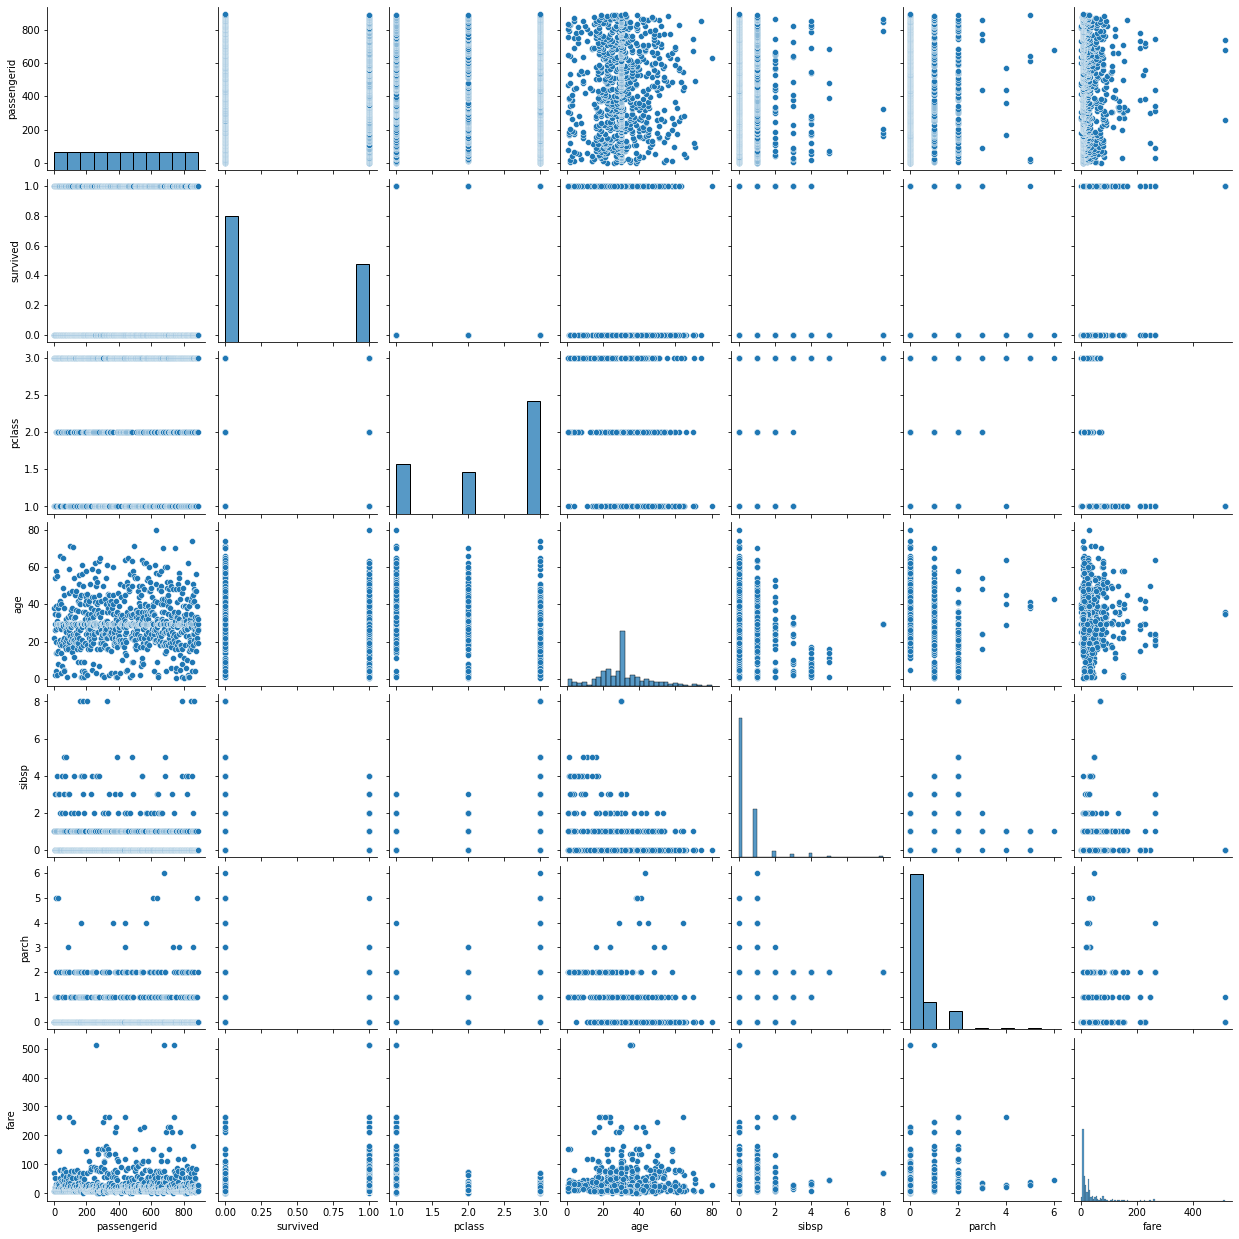

In [26]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(train_df)
plt.show()

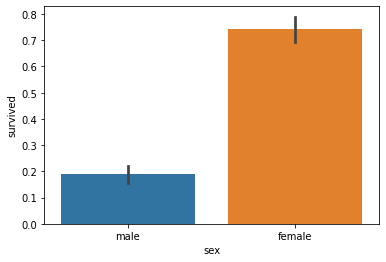

In [27]:
# Barplot showing sex against survived
sns.barplot(x='sex', y='survived',data=train_df);

From the bar plot, we see that more female survived in the Titanic incident compared to male. 

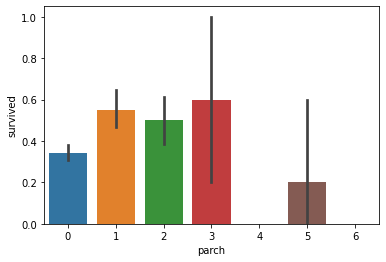

In [28]:
# Barplot showing parch against survived
sns.barplot(x='parch', y='survived',data=train_df);

According to the bar plot, most of the survivers had 3 Number of Parents/Children Aboard, followed closely by 1, then 2.

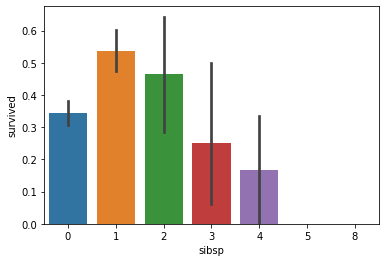

In [29]:
# Barplot showing sibsp against survived
sns.barplot(x='sibsp', y='survived',data=train_df);

According to the bar graph, most people who survived had 1 siblingor spouses, followed by 2, and 0.

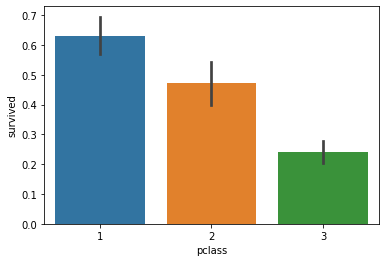

In [30]:
# Barplot showing pclass against survived
sns.barplot(x='pclass', y='survived',data=train_df);

According to the bar graph, most people who survived were in first class, followed by 2, then 3. This could be because passengers in the first class were given priority for getting life boats.

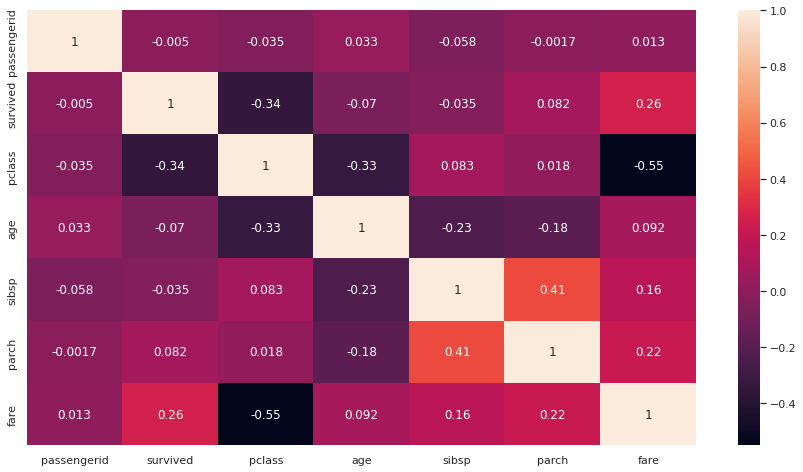

In [31]:
# Plotting a heatmap to show the correlation between the different numerical  variables
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train_df.corr(),annot=True);

In the heatmap, the values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases (for instance, pclass and fare).

From the table, we can see that the independent variables are not correlated. There is no value above 1.000

##7. Implementing the Solution

### KNN Classifier

#### Splitting 80-20

In [88]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
train_df1=train_df.copy()

In [89]:
# Displaying the columns in our training dataset
print(train_df1.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')


In [90]:
# Assigning categorical columns to the variable cols, then converting it to an array
cols_traindf1=train_df1.select_dtypes(include="object").columns.tolist()

In [91]:
# Label Encoding our categorical variable
le=LabelEncoder()
train_df1[cols_traindf1]=train_df1[cols_traindf1].apply(le.fit_transform)

In [92]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Standardising our features and Assigning varibale to our X and y

X=train_df1.drop(['survived','passengerid', 'name','fare','ticket'], axis=1)
y=train_df1['survived'].values

In [93]:
# Creating a Train and Test Split
#Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [94]:
# Performing scaling on our features so that all of them can be uniformly evaluated.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
# Checking the shape of our X_train,y_train and X_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(712, 6)
(712,)
(179, 6)


In [96]:
# Instantiating the model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
# Predict based on the model we've trained
y_pred = classifier.predict(X_test)

In [98]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.7877094972067039 and the f1 score is 0.703125
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



array([[96, 14],
       [24, 45]])

- Our accuracy score is 78.77% and the f1 score is 0.70. This means that our model is not so bad.
- According to the confusion matrix, our model was able to correctly predict 96 passengers who survived and 45 passengers who did not survive(Total - 141). It however gave wrong predictions of 14 passengers who survived and 24 passengers who did not survive (Total - 38).
- Overall, the correct predictions are more than the incorrect prediction, hence our model is decent enough. 


#### Performing the Prediction on our Test Set

In [99]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
test_df1=test_df.copy()

In [100]:
# Assigning categorical columns to the variable cols, then converting it to an array
cols_testdf1=test_df1.select_dtypes(include="object").columns.tolist()

In [101]:
# Label Encoding our categorical variable
le=LabelEncoder()
test_df1[cols_testdf1]=test_df1[cols_testdf1].apply(le.fit_transform)

In [106]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Standardising our features and Assigning varibale to our X and y
X_test1=StandardScaler().fit_transform(test_df1.drop(['passengerid', 'name','fare','ticket'], axis=1))

In [107]:
# Making a prediction on our Test Dataset
y_pred = classifier.predict(X_test1)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

####Splitting 70-30

In [74]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
train_df2=train_df.copy()

In [75]:
# Displaying the columns in our training dataset
print(train_df2.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')


In [76]:
# Assigning categorical columns to the variable cols, then converting it to an array
cols_traindf2=train_df2.select_dtypes(include="object").columns.tolist()

In [77]:
# Label Encoding our categorical variable
le=LabelEncoder()
train_df2[cols_traindf2]=train_df2[cols_traindf2].apply(le.fit_transform)

In [81]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Assigning varibale to our X and y

X=train_df2.drop(['survived','passengerid', 'name','fare','ticket'], axis=1)
y=train_df2['survived'].values

In [125]:
# Creating a Train and Test Split
#Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [83]:
# Performing scaling on our features so that all of them can be uniformly evaluated.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Checking the shape of our X_train,y_train and X_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(623, 6)
(623,)
(268, 6)


In [85]:
# Instantiating the model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
# Predict based on the model we've trained
y_pred = classifier.predict(X_test)

In [87]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.7649253731343284 and the f1 score is 0.6802030456852791
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.69      0.67      0.68       100

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



array([[138,  30],
       [ 33,  67]])

- Our accuracy score is 76.49% and the f1 score is 0.68. This means that our model is not so bad, but not it is slightly less accurate than when we did the (80-20) split. 
- According to the confusion matrix, our model was able to correctly predict 138 passengers who survived and 67 passengers who did not survive(Total - 205). It however gave wrong predictions of 30 passengers who survived and 33 passengers who did not survive (Total - 63).
- Overall, the correct predictions are more than the incorrect prediction, hence our model is decent enough, but not better performing compared to our inital model of the (80-20) split.

#### Performing the Prediction on our Test Set

In [109]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
test_df2=test_df.copy()

In [110]:
# Assigning categorical columns to the variable cols, then converting it to an array
cols_testdf2=test_df2.select_dtypes(include="object").columns.tolist()

In [111]:
# Label Encoding our categorical variable
le=LabelEncoder()
test_df2[cols_testdf2]=test_df2[cols_testdf2].apply(le.fit_transform)

In [112]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Standardising our features and Assigning varibale to our X and y
X_test2=StandardScaler().fit_transform(test_df2.drop(['passengerid', 'name','fare','ticket'], axis=1))

In [113]:
# Making a prediction on our Test Dataset
y_pred = classifier.predict(X_test2)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

####Splitting 60-40

In [114]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
train_df3=train_df.copy()

In [115]:
# Displaying the columns in our training dataset
print(train_df3.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')


In [116]:
# Assigning categorical columns to the variable cols, then converting it to an array
cols_traindf3=train_df3.select_dtypes(include="object").columns.tolist()

In [117]:
# Label Encoding our categorical variable
le=LabelEncoder()
train_df3[cols_traindf3]=train_df3[cols_traindf3].apply(le.fit_transform)

In [118]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Assigning varibale to our X and y

X=train_df3.drop(['survived','passengerid', 'name','fare','ticket'], axis=1)
y=train_df3['survived'].values

In [119]:
# Creating a Train and Test Split
#Train using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

In [120]:
# Performing scaling on our features so that all of them can be uniformly evaluated.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
# Checking the shape of our X_train,y_train and X_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(534, 6)
(534,)
(357, 6)


In [122]:
# Instantiating the model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [123]:
# Predict based on the model we've trained
y_pred = classifier.predict(X_test)

In [124]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.7675070028011205 and the f1 score is 0.6819923371647508
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       221
           1       0.71      0.65      0.68       136

    accuracy                           0.77       357
   macro avg       0.75      0.75      0.75       357
weighted avg       0.76      0.77      0.77       357



array([[185,  36],
       [ 47,  89]])

- Our accuracy score is 76.75% and the f1 score is 0.68. This means that our model is not so bad, but it is slightly less accurate than when we did the (80-20) split and slighly more accurate compared to the (70-30) split. 
- According to the confusion matrix, our model was able to correctly predict 185 passengers who survived and 89 passengers who did not survive(Total - 274). It however gave wrong predictions of 36 passengers who survived and 47 passengers who did not survive (Total - 83).
- Overall, the correct predictions are more than the incorrect prediction, hence our model is decent enough, but not better performing compared to our inital model of the (80-20) split.

#### Performing the Prediction on our Test Set

In [126]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
test_df3=test_df.copy()

In [127]:
# Assigning categorical columns to the variable cols, then converting it to an array
cols_testdf3=test_df3.select_dtypes(include="object").columns.tolist()

In [128]:
# Label Encoding our categorical variable
le=LabelEncoder()
test_df3[cols_testdf3]=test_df3[cols_testdf3].apply(le.fit_transform)

In [129]:
# Let's drop ther survived column in our X, along with other unnecessary columns in our prediction
# Standardising our features and Assigning varibale to our X and y
X_test3=StandardScaler().fit_transform(test_df3.drop(['passengerid', 'name','fare','ticket'], axis=1))

In [130]:
# Making a prediction on our Test Dataset
y_pred = classifier.predict(X_test3)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

After performing the three splits(80-20, 70-30, and 60-40), they all yielded decend results. Below are their accuracy and f1 scores:
- 80-20 Split: Accuracy Score - 78.77% and f1 score - 0.70
- 70-30 Split: Accuracy Score - 76.49%% and f1 score - 0.68
- 60-40 Split: Accuracy Score - 76.75% and f1 score - 0.68

I will therefore recommend the 80-20 split for this dataset.

#### Optimizing the Best Performing (80-20 Split) Model using LDA

In [142]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
train_df4=train_df.copy()

In [143]:
# Checking the columns of the dataset
train_df4.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [145]:
# Assigning categorical columns to the variable cols, then converting it to an array
cols_traindf4=train_df4.select_dtypes(include="object").columns.tolist()

In [146]:
# Label Encoding our categorical variable
le=LabelEncoder()
train_df4[cols_traindf4]=train_df4[cols_traindf4].apply(le.fit_transform)

In [147]:
n_neighbors = 5
random_state = 0

# Splitting the data into dependent and independent variables
X = train_df4.drop('survived', axis=1)
y = train_df4.iloc[:, 1].values

# Creating a Train and Test Split
#Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Performing Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Perfoming LDA to reduce the dimentionality of our dataset
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [149]:
# Training and Making Predictions
# We will use the KNN classifier to evaluate the performance of a LDA-reduced algorithms as shown
# 

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [150]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.7821229050279329 and the f1 score is 0.7022900763358778
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



array([[94, 16],
       [23, 46]])

- Our accuracy score is 78.21% and the f1 score is 0.70. This means that our model is not so bad, but it is slightly less accurate than when we did the (80-20) split before perfoming LDA.
- According to the confusion matrix, our model was able to correctly predict 94 passengers who survived and 46 passengers who did not survive(Total - 140). It however gave wrong predictions of 16 passengers who survived and 23 passengers who did not survive (Total - 39).
- Overall, the correct predictions are more than the incorrect prediction, hence our model is decent enough, but not better performing compared to our inital model of the (80-20) split without performing LDA.

##8. Challenging the Solution

#### Performing LDA and using Random Forest Classifier

In [151]:
# Making a copy of our original dataset so that I can work on the copy and keep the original
train_df5=train_df.copy()

In [152]:
# Checking the columns of the dataset
train_df5.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [153]:
# Assigning categorical columns to the variable cols, then converting it to an array
cols_traindf5=train_df5.select_dtypes(include="object").columns.tolist()

In [154]:
# Label Encoding our categorical variable
le=LabelEncoder()
train_df5[cols_traindf5]=train_df5[cols_traindf5].apply(le.fit_transform)

In [157]:
n_neighbors = 5
random_state = 0

# Splitting the data into dependent and independent variables
X = train_df5.drop('survived', axis=1)
y = train_df5.iloc[:, 1].values

# Creating a Train and Test Split
#Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Performing Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Perfoming LDA to reduce the dimentionality of our dataset
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [158]:
# Training and Making Predictions
# We will use the Random Forest classifier to evaluate the performance of a LDA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [159]:
 # Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.8100558659217877 and the f1 score is 0.7258064516129032
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       110
           1       0.82      0.65      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



array([[100,  10],
       [ 24,  45]])

The accuracy score of Random Forest Classifier is 81% and the f1 score is 0.73.

## Conclusion

- After challenging my solution, I found that Random Forest Classifier performs better than the best model of KNN (80-20) split. Random Forest provides 81% accuracy, while KNN (80-20) split provides 78.77%.
- This, therefore make Random Forest Classifier the best option for this dataset.